Medical Cost Personal Insurance Datasets
Problem Statement:
Insurance Forecast by using Linear Regression

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

·         age: age of primary beneficiary

·         sex: insurance contractor gender, female, male

    ·       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to 
    
            height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       children: Number of children covered by health insurance / Number of dependents

·     smoker: Smoking

·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     charges: Individual medical costs billed by health insurance

# Predict : Charges

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [124]:
#importing dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")


In [125]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [126]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [127]:
df.charges.nunique

<bound method IndexOpsMixin.nunique of 0       16884.924000
1        1725.552300
2        4449.462000
3       21984.470610
4        3866.855200
5        3756.621600
6        8240.589600
7        7281.505600
8        6406.410700
9       28923.136920
10       2721.320800
11      27808.725100
12       1826.843000
13      11090.717800
14      39611.757700
15       1837.237000
16      10797.336200
17       2395.171550
18      10602.385000
19      36837.467000
20      13228.846950
21       4149.736000
22       1137.011000
23      37701.876800
24       6203.901750
25      14001.133800
26      14451.835150
27      12268.632250
28       2775.192150
29      38711.000000
30      35585.576000
31       2198.189850
32       4687.797000
33      13770.097900
34      51194.559140
35       1625.433750
36      15612.193350
37       2302.300000
38      39774.276300
39      48173.361000
40       3046.062000
41       4949.758700
42       6272.477200
43       6313.759000
44       6079.671500
45      20630.28

In [128]:
df.shape

(1338, 7)

# The target Variable charges is a continous variable so the problem statement is Regression Problem 

In [129]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

sex,smoker,region is of object data type(ie categorical) and rest are int and float variables.The output label Charges is of float datatype



In [130]:
#displaying all the available columns in the dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no null values

# Missing values

In [132]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

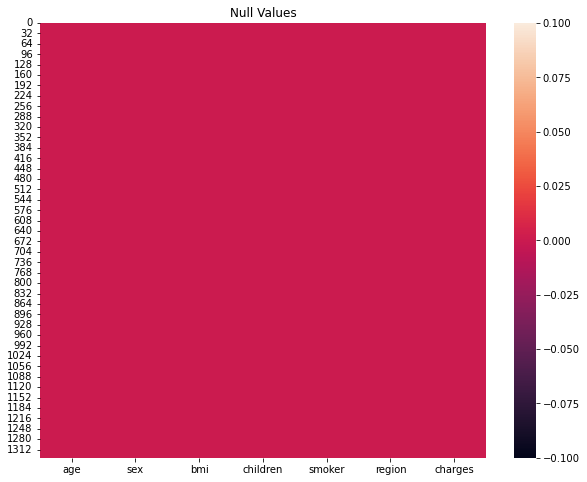

In [133]:
# heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

There are no missing values in the dataset

# Statistics summary

In [134]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

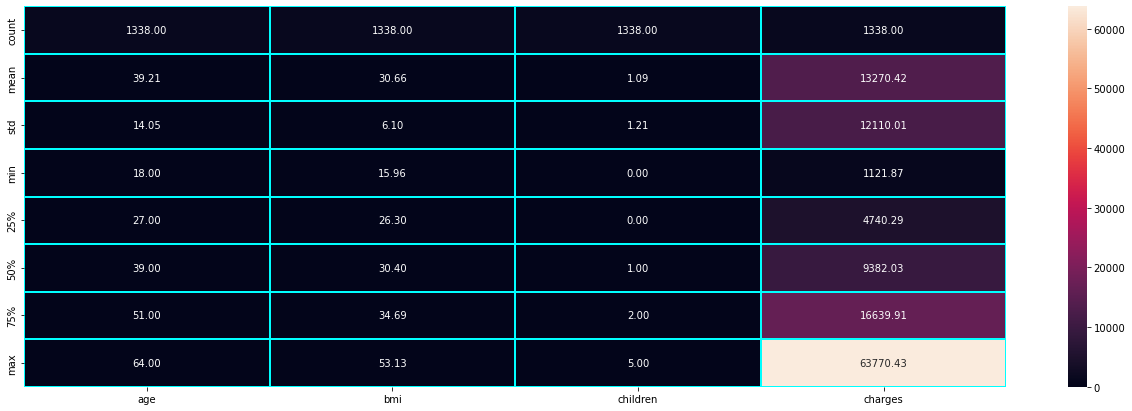

In [135]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="cyan",fmt="0.2f")

we are able to observe some outiers in the data,data looks good

In [136]:
#exploring data variable
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

there are 676 male and 662 female in the data set

In [137]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

No of person who smokes is 274 while those dont is 1064

In [138]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

we are able to observe almost similar number of data in all four regions ,slighty higher in south east is observed

# Encoding 

In [139]:
#importing OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [140]:
#sex
df.sex=OE.fit_transform(df.sex.values.reshape(-1,1))

In [141]:
df.sex.value_counts()

1.0    676
0.0    662
Name: sex, dtype: int64

In [142]:
#smoker
df.smoker=OE.fit_transform(df.smoker.values.reshape(-1,1))

In [143]:
df.smoker.value_counts()

0.0    1064
1.0     274
Name: smoker, dtype: int64

In [144]:
#region
df.region=OE.fit_transform(df.region.values.reshape(-1,1))

In [145]:
df.region.value_counts()

2.0    364
3.0    325
1.0    325
0.0    324
Name: region, dtype: int64

# Visualization

In [146]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [147]:
collist=df.columns.values
ncol=8
nrows=10


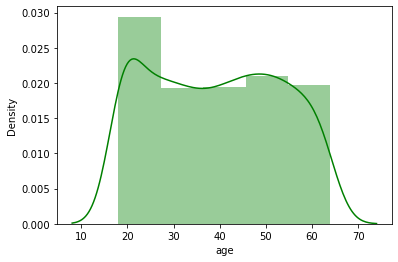

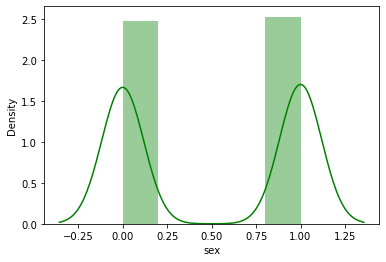

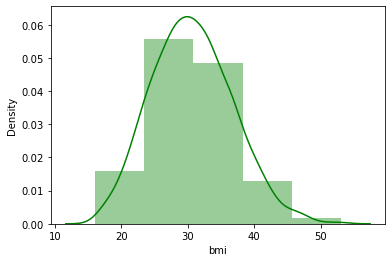

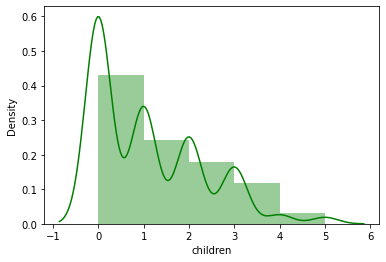

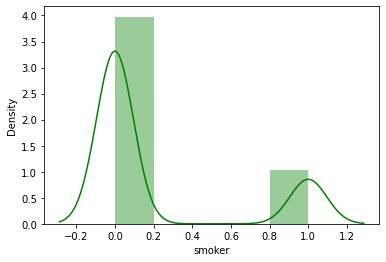

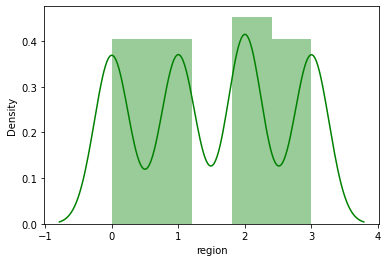

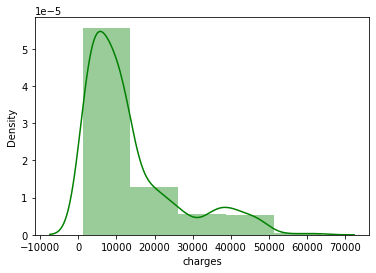

In [44]:
def dtp(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='green',bins=5)
    
for i in range(0,7):
    dtp(i)

<AxesSubplot:xlabel='age', ylabel='Density'>

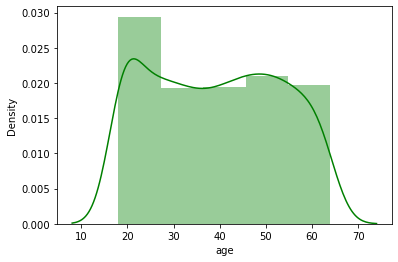

In [148]:
#age
sns.distplot(df.age,color='green',bins=5)

Age looks non skewed

<AxesSubplot:xlabel='sex', ylabel='Density'>

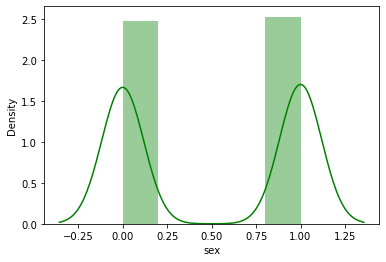

In [149]:
#sex
sns.distplot(df.sex,color='green',bins=5)

sex looks non skewed

<AxesSubplot:xlabel='bmi', ylabel='Density'>

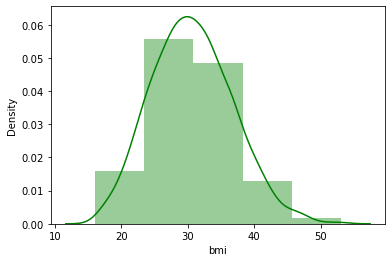

In [150]:
#bmi
sns.distplot(df.bmi,color='green',bins=5)

data is nonskewed

<AxesSubplot:xlabel='children', ylabel='Density'>

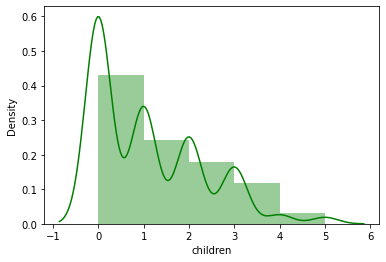

In [151]:
#children
sns.distplot(df.children,color='green',bins=5)

data looks rightskewed

<AxesSubplot:xlabel='smoker', ylabel='Density'>

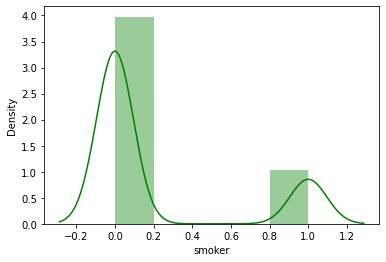

In [152]:
#smoker
sns.distplot(df.smoker,color='green',bins=5)

data looks skewed

<AxesSubplot:xlabel='region', ylabel='Density'>

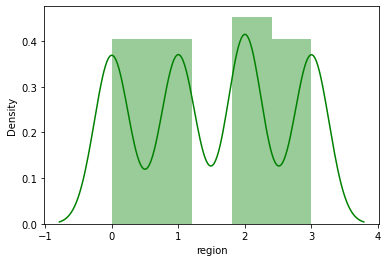

In [153]:
#region
sns.distplot(df.region,color='green',bins=5)

data looks non skewed

<AxesSubplot:xlabel='charges', ylabel='Density'>

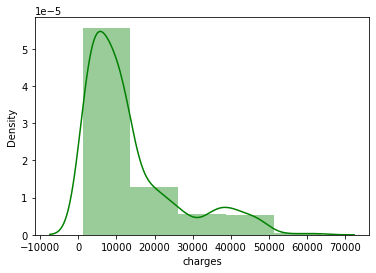

In [154]:
#charges
sns.distplot(df.charges,color='green',bins=5)

data looks right skewed

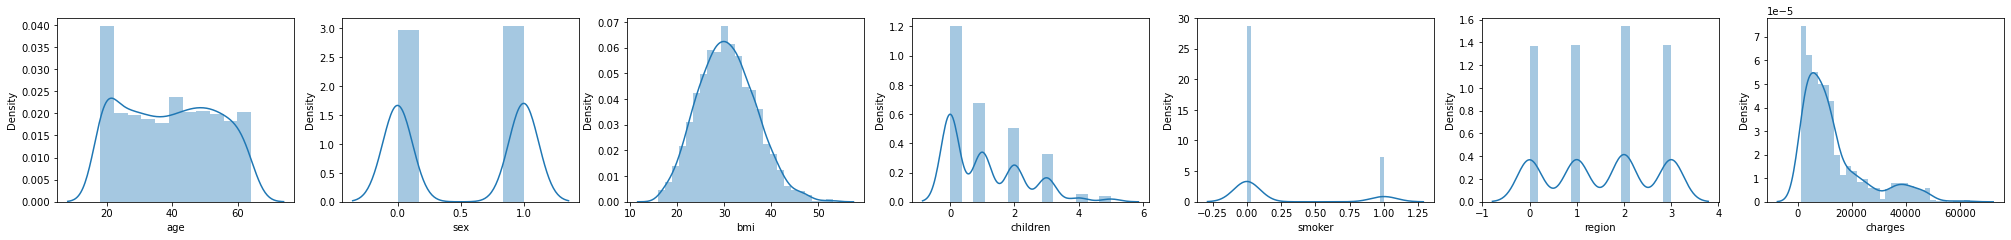

In [155]:
plt.figure(figsize=(40,40))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [158]:
columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

<AxesSubplot:xlabel='sex', ylabel='count'>

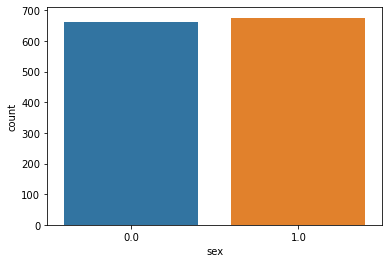

In [159]:
sns.countplot(df.sex)

male and female data is almost equal

<AxesSubplot:xlabel='smoker', ylabel='count'>

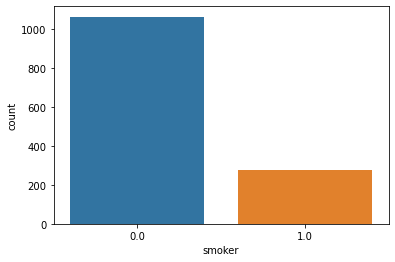

In [160]:
sns.countplot(df.smoker)

we are able to large difference between those who are smoking and non smoker

<AxesSubplot:xlabel='region', ylabel='count'>

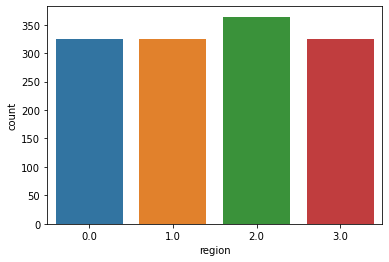

In [161]:
sns.countplot(df.region)

data is alomst equal in count for each regions

# bi variant analysis

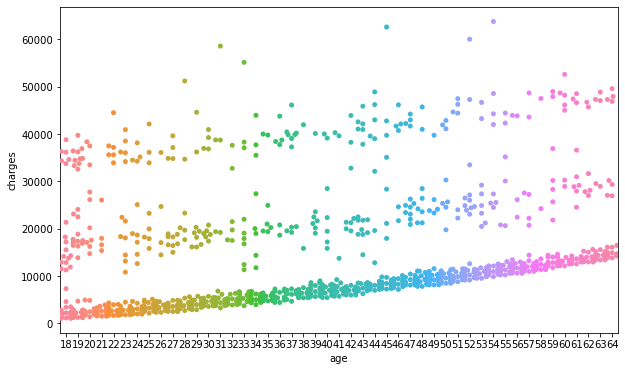

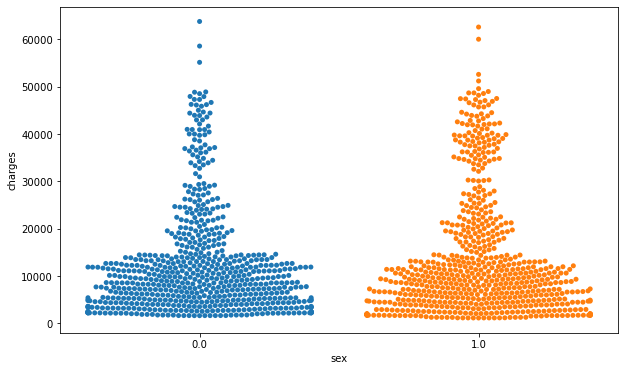

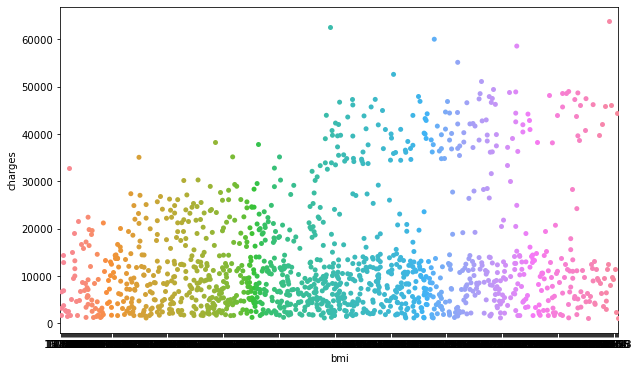

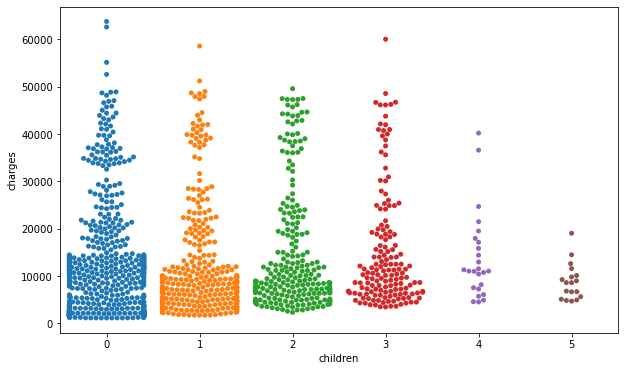

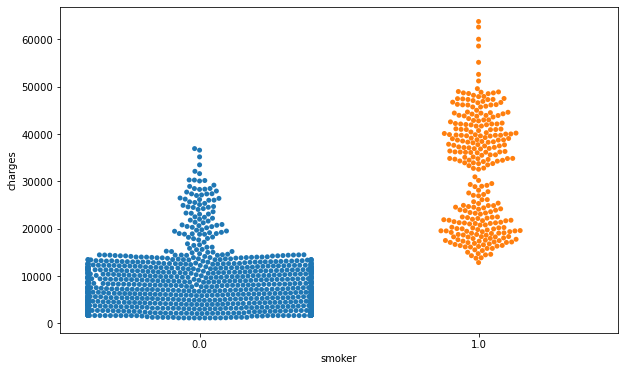

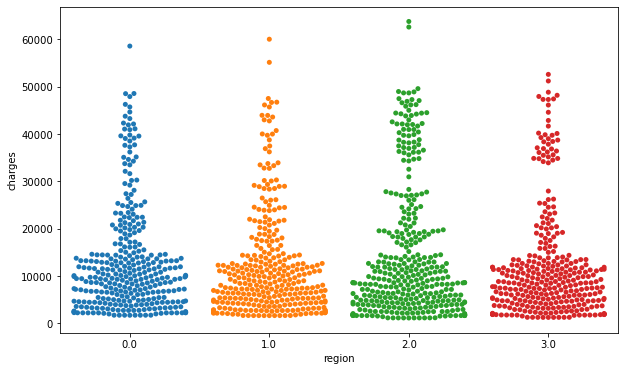

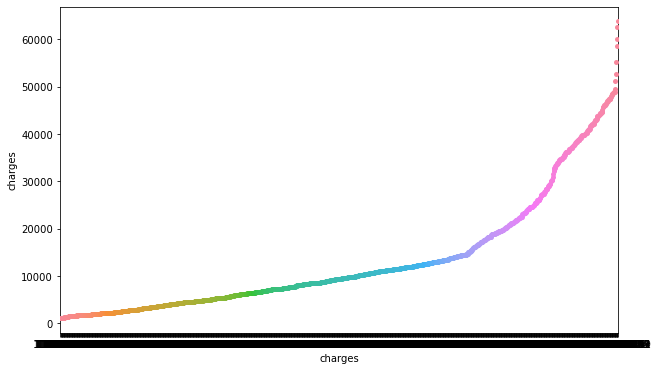

In [162]:
#relationship for each feature name with the output
def dtp(a):
    plt.figure(figsize=[10,6])
    sns.swarmplot(x=df[columns[a]],y=df['charges'])
    
for i in range(0,7):
    dtp(i)

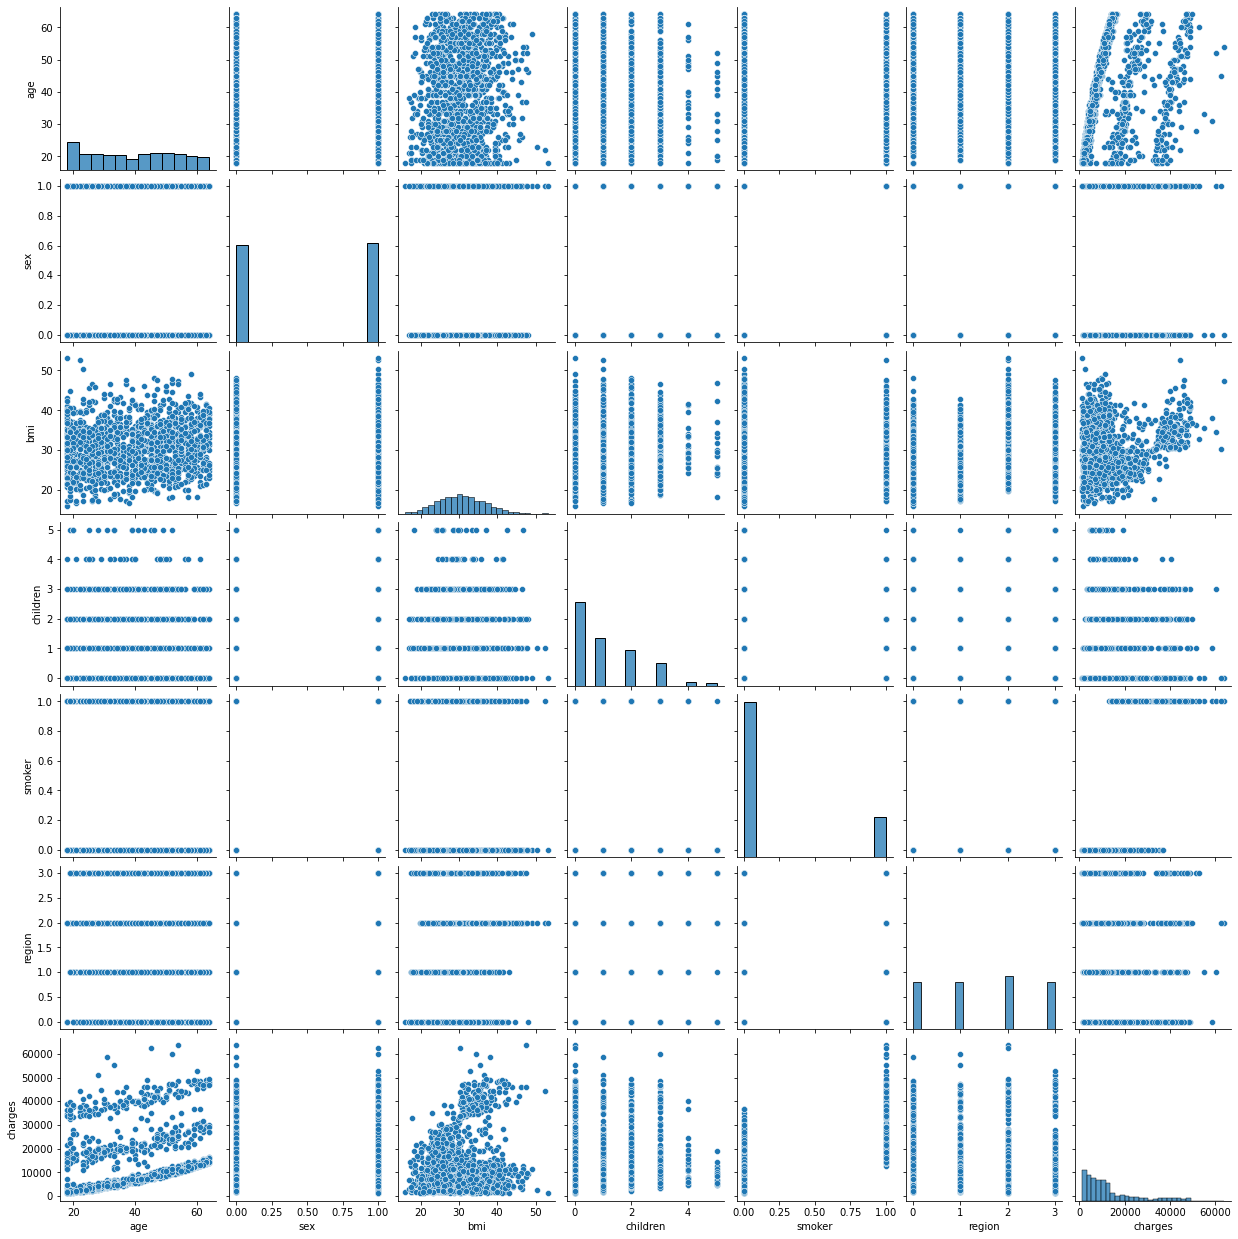

In [163]:
sns.pairplot(df)

In [ ]:
positive linear relationship is showing in almost all columns except 

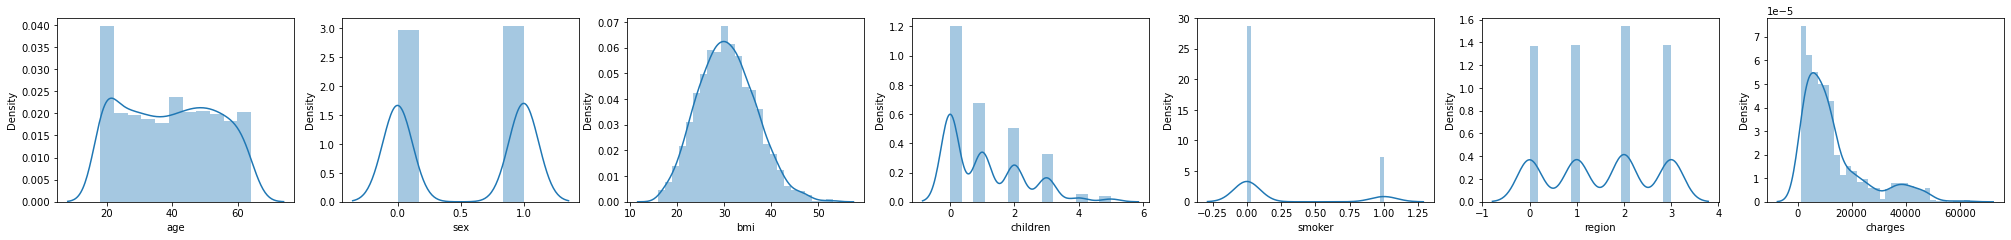

In [164]:
plt.figure(figsize=(40,40))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

# Detecting Outliers

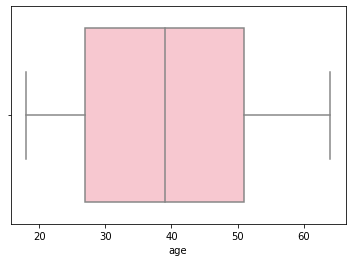

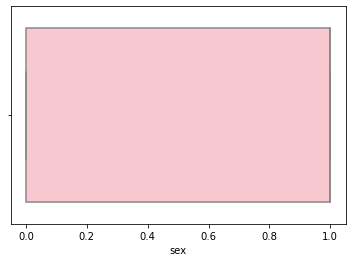

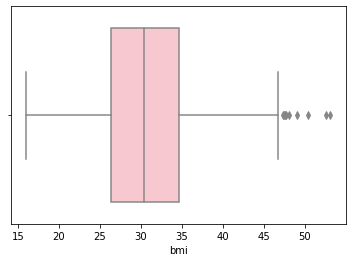

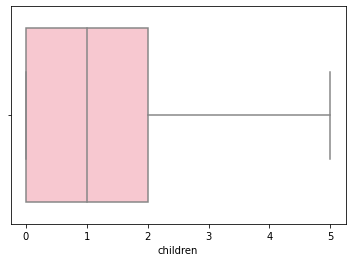

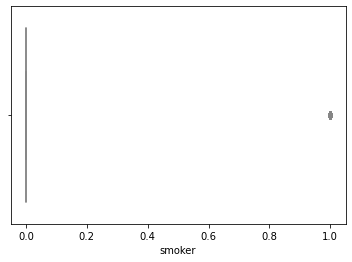

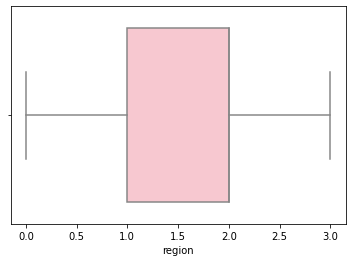

In [165]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],color='pink')
    
for i in range(0,6):
    bxplt(i)

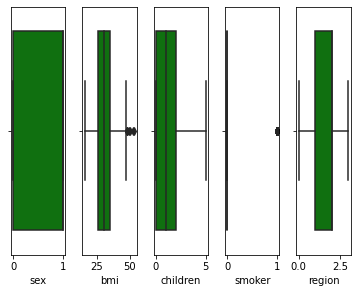

In [166]:
# to see outliers in a single visualization

plt.figure(figsize=(ncol,5*ncol))
for i in range(1,(len(collist)-1)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Removing outliers

In [167]:
#zscore

from scipy.stats import zscore
z=np.abs(zscore(df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
5,0.584350,1.010519,0.807656,0.908614,0.507463,0.438495,0.785908
6,0.483668,1.010519,0.455486,0.078767,0.507463,0.438495,0.415500
7,0.157143,1.010519,0.479567,1.580926,0.507463,0.466915,0.494728
8,0.157143,0.989591,0.136714,0.751079,0.507463,1.372326,0.567017
9,1.480485,1.010519,0.791252,0.908614,0.507463,0.466915,1.293027


In [186]:

threshold=2.65
print(np.where(z>2.65))


(array([  32,   34,   39,   55,   71,   94,  109,  116,  166,  175,  251,
        265,  281,  286,  288,  328,  330,  401,  413,  420,  421,  425,
        438,  488,  530,  543,  543,  549,  568,  569,  577,  640,  668,
        674,  677,  819,  847,  860,  860,  877,  883,  901,  932,  937,
        951,  969,  984, 1047, 1062, 1085, 1088, 1116, 1122, 1130, 1146,
       1230, 1240, 1241, 1245, 1272, 1284, 1300, 1301, 1317], dtype=int64), array([3, 6, 6, 6, 3, 6, 6, 2, 3, 6, 6, 6, 6, 2, 6, 6, 6, 2, 3, 6, 6, 3,
       3, 6, 6, 2, 6, 6, 3, 6, 6, 3, 6, 6, 6, 6, 2, 2, 6, 3, 6, 6, 3, 3,
       6, 3, 3, 2, 6, 3, 2, 3, 6, 3, 6, 6, 6, 6, 3, 3, 6, 6, 6, 2],
      dtype=int64))


for adequate outlier removal threshold=2.65 is choose with minimum data loss in place

In [183]:
df_new=df[(z<2.65).all(axis=1)]

In [184]:
df_new.shape

(1276, 7)

In [185]:
df.shape

(1338, 7)

In [180]:
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
print(data_loss)

4.633781763826607


since dataloss is less than 10% it is ok

In [187]:
df=df_new

In [188]:
df.shape

(1276, 7)

# visualizing the data after outliers removal 

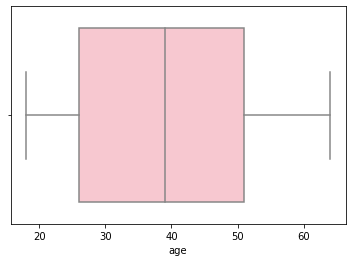

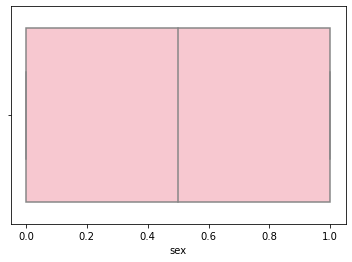

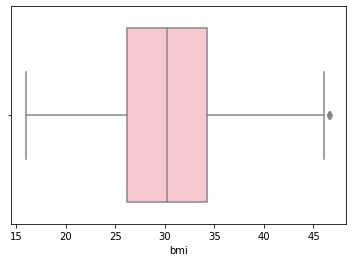

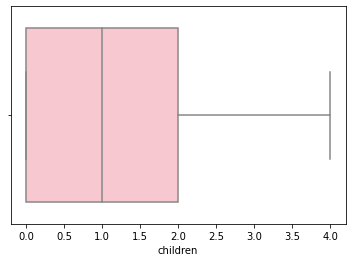

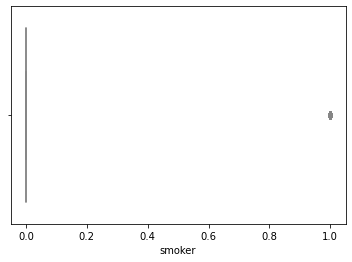

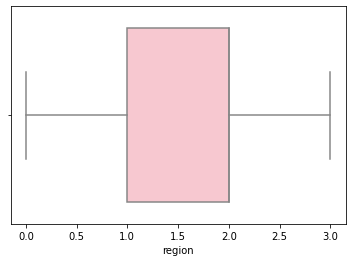

In [181]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],color='pink')
    
for i in range(0,6):
    bxplt(i)

# Skewness Removal

In [208]:
#initialising x and y
X=df.drop(['charges'],axis=1)
y=df.charges

In [209]:
X.skew()

age         0.079937
sex         0.000000
bmi         0.160299
children    0.757647
smoker      1.631499
region     -0.012400
dtype: float64

the smoker is nominal data ,so no need to work skewness on it.

# Scaling the data

In [210]:
SC=StandardScaler()
X_scaled=SC.fit_transform(X)

In [211]:
#checking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns

In [212]:
vif

,vif,features
0,1.019824,age
1,1.008328,sex
2,1.040594,bmi
3,1.003878,children
4,1.017785,smoker
5,1.026655,region


In [217]:
df_cor=df.corr()


<AxesSubplot:>

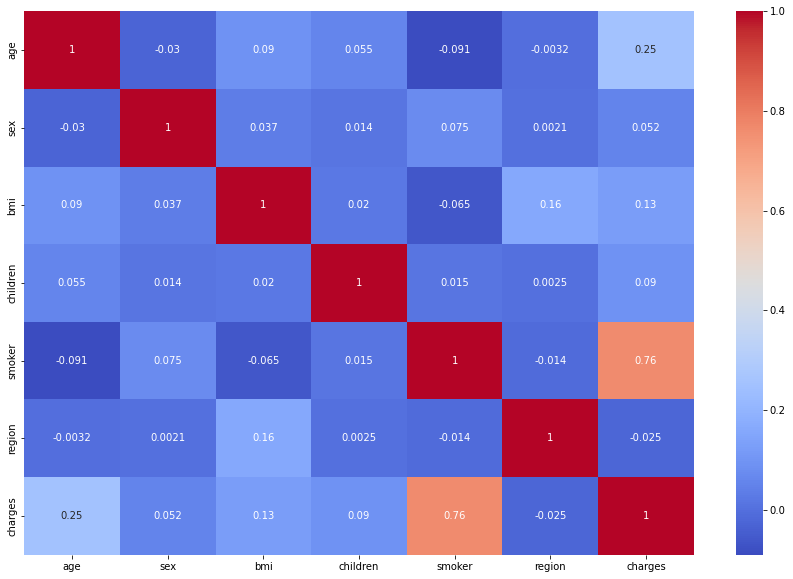

In [218]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,cmap='coolwarm',annot=True)

will remove the asex,children as they are having vif very close to 1 and rest of the parameters have dependency on the
medical cost insurance based on problem statement and heatmap and the analysis to insurance as well.So keeping the rest for now

In [215]:
X=df.drop(['sex','children','charges'],axis=1)

feature columns after dropping the columns

In [216]:
X.columns

Index(['age', 'bmi', 'smoker', 'region'], dtype='object')

# Model Building

In [222]:
#x,y already initialized
X.shape

(1276, 4)

In [223]:

y.shape

(1276,)

In [225]:
#finding best random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.7801594832397836  on random_state  44


In [227]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=44)

In [228]:
#shapes of x and y (train,test)
x_train.shape

(1020, 4)

In [229]:
x_test.shape

(256, 4)

In [230]:
y_train.shape

(1020,)

In [231]:
y_test.shape

(256,)

In [232]:

# different algorithm going to use
from sklearn.linear_model import LogisticRegression

lr=LinearRegression()
ri=Ridge()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor(n_estimators=100)
adr=AdaBoostRegressor(n_estimators=100)
lg=LogisticRegression()

In [237]:
#code for Training and Prediction 

def evaluate(x):
    mod=x
    print(mod)
    mod.fit(x_train,y_train)
    pred_train=mod.predict(x_train)
    pred_test=mod.predict(x_test)
    
    print("r2_score(predicted_train) is ",r2_score(y_train,pred_train))
    print("\n")
    print("r2_score is :",r2_score(y_test,pred_test))
    print("\n")
    print("intercept is : ",lr.intercept_)
    print("\n")
    print("Coefficient is  : ",lr.coef_)
    print("\n")
    print("Score of trained data :",lr.score(x_train,y_train))
    print("\n")
    print("Score of test data :",lr.score(x_test,y_test))
    print("\n")
    print("Error")
    print("mean absolute error : ",mean_absolute_error(y_test,pred_test))
    print("mean squared error : ",mean_squared_error(y_test,pred_test))

In [238]:
#calling LinearRegression model
evaluate(lr) 

LinearRegression()
r2_score(predicted_train) is  0.6845964966731246


r2_score is : 0.7801594832397836


intercept is :  -8576.604936155096


Coefficient is  :  [  242.12678026   263.64850005 21262.84110342  -321.02431854]


Score of trained data : 0.6845964966731246


Score of test data : 0.7801594832397836


Error
mean absolute error :  3847.5407231721006
mean squared error :  30187230.765285786
